This notebook downloads and explores the MNIST dataset

## Import statements

In [133]:
import keras.backend as K
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


%matplotlib inline

## Load the dataset

In [116]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [117]:
X_train = X_train.swapaxes(0, 2)
X_test = X_test.swapaxes(0, 2)
X = np.dstack([X_train, X_test]).swapaxes(0, 2)
X = X.astype('float32')

In [122]:
y = np.hstack([y_train, y_test])

In [123]:
X.shape

(70000, 28, 28)

In [124]:
y.shape

(70000,)

In [125]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

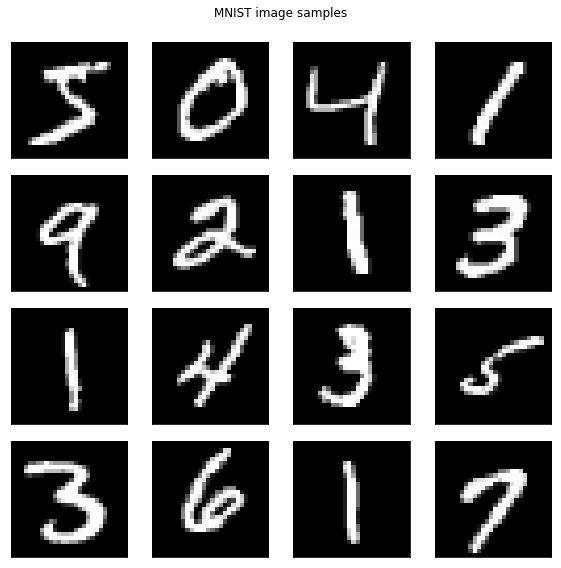

In [126]:
fig, ax = plt.subplots(4, 4, figsize=(8, 8))

for i in range(0, 16):
    plt.sca(ax[i // 4, i % 4])
    plt.imshow(X[i, :, :], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
plt.suptitle('MNIST image samples')
plt.tight_layout()
plt.subplots_adjust(top=0.92)

<Figure size 360x360 with 0 Axes>

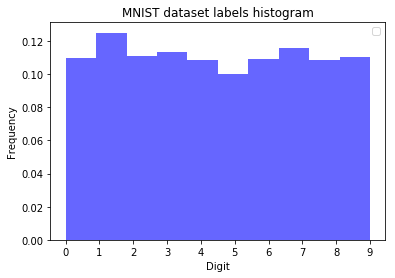

In [129]:
plt.figure(figsize=(5, 5))

pd.DataFrame(y).plot.hist(bins=10, density=True, alpha=0.6, color='Blue')

plt.xticks(range(0, 10))
plt.xlabel('Digit')
plt.title('MNIST dataset labels histogram')
plt.legend([])

## Convert numeric to categorical labels

In [135]:
y_cat = to_categorical(y)

In [136]:
y_cat.shape

(70000, 10)

## Image pixels normalization

In [131]:
X /= 255.0

## Save preprocessed dataset to a file

In [137]:
np.savez_compressed('../data/preprocessed.npz', {'X':X, 'y':y, 'y_cat':y_cat})

FileNotFoundError: [Errno 2] No such file or directory: '../data/preprocessed.npz'